# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable Trends
1. The strongest correlation between one of the weather characteristics and equator is definitely Temperature.
2.  Cities closest to the equator have the warmest temperatures.
3.  Most of my random cities had at least 20% humidity, with the majority of those falling between 60 and 100% humidity
4.  Cloudiness virtually has no correlation with the equator
5.  The correlation with wind speed seemed to be very weak

In [21]:
# Dependencies and Setup
!pip install ratelimiter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import json
import seaborn as sns
import random
from ratelimiter import RateLimiter
from datetime import datetime
import requests

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [22]:
#Generate random lat/lon coordinates
counter = 0
rndlat=[]
rndlon=[]

while len(rndlat) < 750:
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    rndlat.append(lat)
    rndlon.append(lon)
    counter += 1
 

geo_df = pd.DataFrame ({"lat": rndlat, "lon":rndlon})
geo_df.head()

,lat,lon
0,54.613357,-40.109429
1,53.793427,-96.204790
2,73.648788,-154.999147
3,51.882267,-130.980478
4,-31.679680,-161.783825


## Generate Cities List

In [23]:
#feed data to citipy
city = []
country = []


for index, row in geo_df.iterrows():
    city_lat=(row["lat"])
    city_lon=(row["lon"])
    city_name = citipy.nearest_city(city_lat, city_lon).city_name
    country_code = citipy.nearest_city(city_lat, city_lon).country_code
    city.append(city_name)
    country.append(country_code)
    
city_df= pd.DataFrame ({"city": city, "country": country})
city_df.drop_duplicates(["city", "country"])
city_df.head()

,city,country
0,nanortalik,gl
1,thompson,ca
2,barrow,us
3,prince rupert,ca
4,avarua,ck


In [4]:
weather_data=[]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:

#make API calls and collect data
base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_key}&units={units}&q="
rate_limiter = RateLimiter(max_calls=50, period=60)

for index, row in city_df.iterrows():
    with rate_limiter:
        city_q=row["city"]
        response = requests.get(query_url + city_q).json()
        record_counter=1
        try:
            temp=response["main"]["temp"]
            humid=response["main"]["humidity"]
            cloud=response["clouds"]["all"]
            wind=response["wind"]["speed"]
            city_lat=response["coord"]["lat"]
            city_name=response["name"]
            city_country=response["sys"]["country"]
            weather_data.append({"City": city_name, "Country": city_country, "Latitude": city_lat,
                                "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)":cloud, "Wind Speed (MPH)": wind})
            print (f"Processing record #{record_counter} -- {city_q}")
            print (f'{base_url}appid=***masked***&units={units}&q={city_q}')
            print ("----------------------------------------------------------------")
            record_counter +=1
        except:
            print (f"Weather for {city_q} not found.")
            print ("----------------------------------------------------------------")
            continue

Processing record #1 -- ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ribeira grande
----------------------------------------------------------------
Processing record #1 -- mataura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mataura
----------------------------------------------------------------
Processing record #1 -- vaini
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vaini
----------------------------------------------------------------
Processing record #1 -- viesca
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=viesca
----------------------------------------------------------------
Processing record #1 -- togul
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=togul
----------------------------------------------------------------
Processing record #1 -- polovinnoye
http://api.openweath

Processing record #1 -- umba
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=umba
----------------------------------------------------------------
Processing record #1 -- butaritari
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=butaritari
----------------------------------------------------------------
Processing record #1 -- grindavik
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=grindavik
----------------------------------------------------------------
Processing record #1 -- port macquarie
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port macquarie
----------------------------------------------------------------
Weather for cheuskiny not found.
----------------------------------------------------------------
Processing record #1 -- mingyue
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mingyue
---------

Processing record #1 -- suez
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=suez
----------------------------------------------------------------
Weather for sorvag not found.
----------------------------------------------------------------
Processing record #1 -- torbay
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=torbay
----------------------------------------------------------------
Processing record #1 -- sitka
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sitka
----------------------------------------------------------------
Processing record #1 -- bongandanga
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bongandanga
----------------------------------------------------------------
Processing record #1 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------

Processing record #1 -- port alfred
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port alfred
----------------------------------------------------------------
Processing record #1 -- castro
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=castro
----------------------------------------------------------------
Processing record #1 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #1 -- tiarei
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tiarei
----------------------------------------------------------------
Processing record #1 -- nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nikolskoye
----------------------------------------------------------------
Processing record #1 -- hovd
http://api.openweathe

Processing record #1 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=albany
----------------------------------------------------------------
Processing record #1 -- sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sao joao da barra
----------------------------------------------------------------
Processing record #1 -- raymond
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=raymond
----------------------------------------------------------------
Processing record #1 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #1 -- gazanjyk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=gazanjyk
----------------------------------------------------------------
Processing record #1 -- iqaluit
http://a

Processing record #1 -- sladkovo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sladkovo
----------------------------------------------------------------
Processing record #1 -- buin
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=buin
----------------------------------------------------------------
Weather for grand centre not found.
----------------------------------------------------------------
Processing record #1 -- narsaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=narsaq
----------------------------------------------------------------
Weather for barentsburg not found.
----------------------------------------------------------------
Processing record #1 -- gat
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=gat
----------------------------------------------------------------
Processing record #1 -- tuktoyaktuk
http://api.openweathermap

Processing record #1 -- kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kangaatsiaq
----------------------------------------------------------------
Processing record #1 -- punta cardon
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta cardon
----------------------------------------------------------------
Processing record #1 -- yulara
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=yulara
----------------------------------------------------------------
Processing record #1 -- puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=puerto ayacucho
----------------------------------------------------------------
Processing record #1 -- khatanga
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=khatanga
----------------------------------------------------------------
Processing record #1 -- ka

Processing record #1 -- east london
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=east london
----------------------------------------------------------------
Processing record #1 -- saldanha
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saldanha
----------------------------------------------------------------
Processing record #1 -- bethel
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bethel
----------------------------------------------------------------
Processing record #1 -- east london
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=east london
----------------------------------------------------------------
Processing record #1 -- muros
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=muros
----------------------------------------------------------------
Processing record #1 -- yellowknife
http://api.o

Processing record #1 -- san pedro
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=san pedro
----------------------------------------------------------------
Processing record #1 -- yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=yellowknife
----------------------------------------------------------------
Processing record #1 -- frontera
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=frontera
----------------------------------------------------------------
Processing record #1 -- high prairie
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=high prairie
----------------------------------------------------------------
Processing record #1 -- yulara
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=yulara
----------------------------------------------------------------
Processing record #1 -- norman wells
h

Processing record #1 -- tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tuktoyaktuk
----------------------------------------------------------------
Processing record #1 -- waipawa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=waipawa
----------------------------------------------------------------
Processing record #1 -- vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vestmannaeyjar
----------------------------------------------------------------
Processing record #1 -- hami
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hami
----------------------------------------------------------------
Processing record #1 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #1 -- atuona
http://api.op

Processing record #1 -- yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=yellowknife
----------------------------------------------------------------
Processing record #1 -- rotifunk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rotifunk
----------------------------------------------------------------
Weather for kawana waters not found.
----------------------------------------------------------------
Processing record #1 -- mchinji
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mchinji
----------------------------------------------------------------
Weather for yanan not found.
----------------------------------------------------------------
Processing record #1 -- kaseda
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kaseda
----------------------------------------------------------------
Processing record #1 -- tasiilaq
http://api.

Processing record #1 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Processing record #1 -- hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hithadhoo
----------------------------------------------------------------
Processing record #1 -- luderitz
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=luderitz
----------------------------------------------------------------
Processing record #1 -- balikpapan
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=balikpapan
----------------------------------------------------------------
Processing record #1 -- roald
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=roald
----------------------------------------------------------------
Processing record #1 -- calbuco
http://api.openw

Processing record #1 -- chapais
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=chapais
----------------------------------------------------------------
Weather for attawapiskat not found.
----------------------------------------------------------------
Weather for sentyabrskiy not found.
----------------------------------------------------------------
Processing record #1 -- thompson
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=thompson
----------------------------------------------------------------
Processing record #1 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #1 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #1 -- punta arenas
http://

Processing record #1 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=albany
----------------------------------------------------------------
Processing record #1 -- mataura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mataura
----------------------------------------------------------------
Processing record #1 -- kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kudahuvadhoo
----------------------------------------------------------------
Processing record #1 -- mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mar del plata
----------------------------------------------------------------
Processing record #1 -- pakxan
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=pakxan
----------------------------------------------------------------
Processing record #1 -- gander
http://api.

Processing record #1 -- longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=longyearbyen
----------------------------------------------------------------
Processing record #1 -- saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saint-philippe
----------------------------------------------------------------
Processing record #1 -- port alfred
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port alfred
----------------------------------------------------------------
Processing record #1 -- guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=guerrero negro
----------------------------------------------------------------
Processing record #1 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing rec

Processing record #1 -- fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=fairbanks
----------------------------------------------------------------
Processing record #1 -- jizan
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jizan
----------------------------------------------------------------
Processing record #1 -- limoeiro do ajuru
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=limoeiro do ajuru
----------------------------------------------------------------
Processing record #1 -- ust-tsilma
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ust-tsilma
----------------------------------------------------------------
Processing record #1 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #1 -- rikitea
ht

Processing record #1 -- moree
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=moree
----------------------------------------------------------------
Processing record #1 -- hamilton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hamilton
----------------------------------------------------------------
Processing record #1 -- codrington
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=codrington
----------------------------------------------------------------
Processing record #1 -- narsaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=narsaq
----------------------------------------------------------------
Processing record #1 -- vao
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vao
----------------------------------------------------------------
Processing record #1 -- leshukonskoye
http://api.openweathermap.or

In [14]:

#get count of cities with collected data
print (len(weather_data))

687


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:

weather_df=pd.DataFrame(weather_data)
weather_df=weather_df[["City", "Country","Latitude","Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]]
weather_df.head()

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Ribeira Grande,PT,38.52,77.00,57,20,14.99
1,Mataura,NZ,-46.19,40.65,83,83,8.23
2,Vaini,IN,15.34,77.91,88,88,2.04
3,Viesca,MX,25.34,85.35,38,40,4.70
4,Togul,RU,53.47,65.13,62,0,9.71


In [15]:

weather_df.to_csv("weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

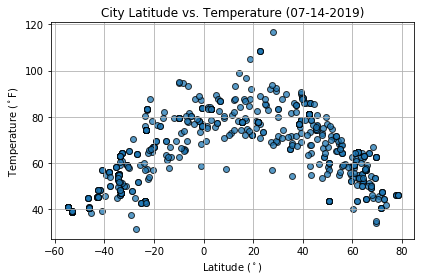

In [16]:

date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("temp.png")
plt.show()

#### Latitude vs. Humidity Plot

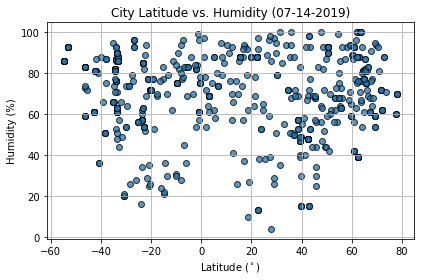

In [17]:

plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

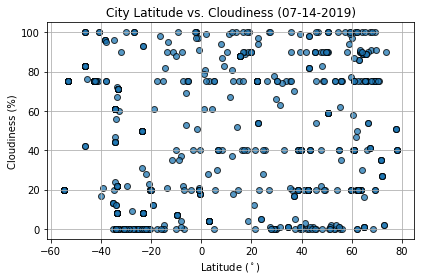

In [18]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("clouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

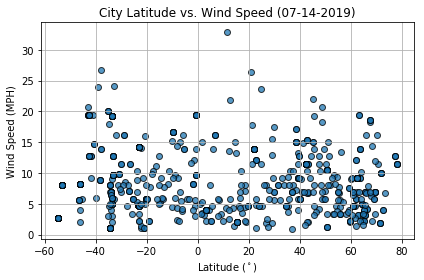

In [19]:

plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (MPH)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("wind.png")
plt.show()